In [8]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [9]:
df=pd.read_csv('mobile-price-classification/train.csv')
test=pd.read_csv('mobile-price-classification/test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [11]:
df.isnull().sum().max()

0

In [12]:
df['price_range'].describe()
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [13]:
corrmat=df.corr()
corrmat

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


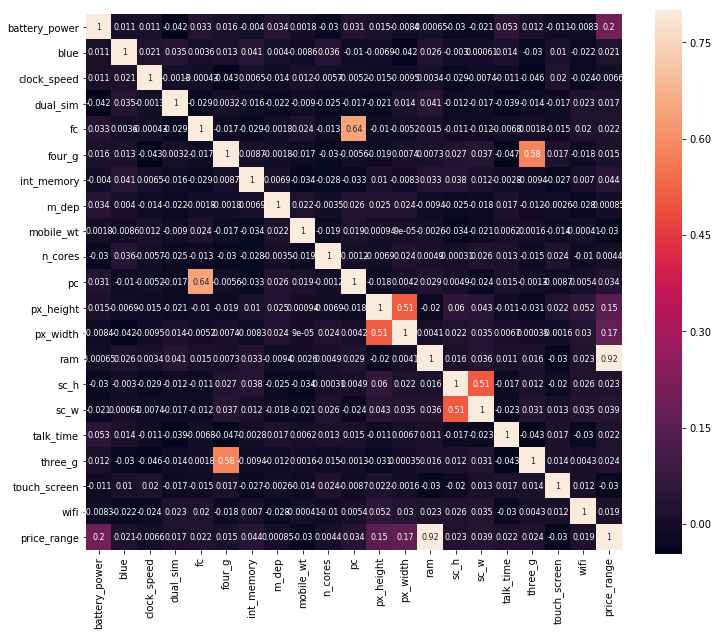

In [14]:
plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, annot_kws={'size':8})

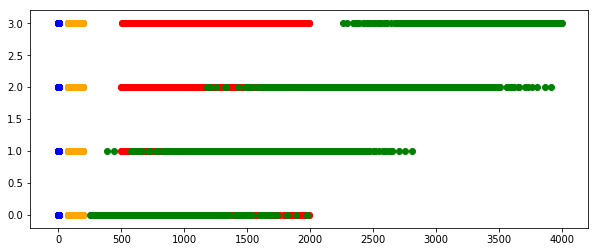

In [15]:
plt.subplots(figsize=(10,4))
plt.scatter(y=df['price_range'], x=df['battery_power'], color='red')
plt.scatter(y=df['price_range'], x=df['ram'], color='green')
plt.scatter(y=df['price_range'], x=df['n_cores'], color='blue')
plt.scatter(y=df['price_range'], x=df['mobile_wt'], color='orange')

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
yt=np.array(df['price_range'])
xt=df.drop(['price_range'], axis=1)
xt=np.array(xt)

In [18]:
xt

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [19]:
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

In [20]:
xt

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [21]:
xtrain, xtest, ytrain, ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

In [22]:
xtrain.shape
print("shape of x train : " + str(xtrain.shape))

shape of x train : (1600, 20)


In [23]:
# Linear SVM을 위한 적절한 C값 검색
# 분류 : SVC, 회귀(예측):SVR
for thisC in [1,3,5,10,40,60,80,100]:
    svc=SVC(kernel='linear', C=thisC)
    model=svc.fit(xtrain, ytrain)
    scoreTrain=model.score(xtrain, ytrain)
    scoreTest=model.score(xtest, ytest)
    print("선형 SVM : C:{}, training score : {:2f}, test score : {:2f}\n".format(thisC, scoreTrain, scoreTest))

선형 SVM : C:1, training score : 0.953750, test score : 0.960000

선형 SVM : C:3, training score : 0.961875, test score : 0.977500

선형 SVM : C:5, training score : 0.968125, test score : 0.975000

선형 SVM : C:10, training score : 0.977500, test score : 0.967500

선형 SVM : C:40, training score : 0.981250, test score : 0.962500

선형 SVM : C:60, training score : 0.981250, test score : 0.962500

선형 SVM : C:80, training score : 0.981875, test score : 0.970000

선형 SVM : C:100, training score : 0.980625, test score : 0.967500



In [24]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
model=SVC(kernel='linear', C=20).fit(xtrain, ytrain)
scores=cross_val_score(model, xtrain, ytrain, cv=5) # cv=5 -> 5 fold
print("CV 점수 : "+ str(scores))
st_scores=cross_val_score(model, xtrain, ytrain, cv=StratifiedKFold(5, random_state=10, shuffle=True))
print("StratifiedKFold CV 점수 : "+str(st_scores))
print("CV 평균 점수 : " + str(scores.mean()))
print("StratifiedKFold CV 평균 점수 : "+str(st_scores.mean()))

CV 점수 : [0.95015576 0.96261682 0.94392523 0.92789969 0.97169811]
StratifiedKFold CV 점수 : [0.97819315 0.92834891 0.93457944 0.97805643 0.96226415]
CV 평균 점수 : 0.9512591238085129
StratifiedKFold CV 평균 점수 : 0.9562884145205576


In [25]:
from sklearn.svm import LinearSVC


In [26]:
for thisC in [1,3,5,10,40,60,80,100]:
    model2=LinearSVC(C=thisC).fit(xtrain, ytrain)
    scoretrain=model2.score(xtrain, ytrain)
    scoretest=model2.score(xtest, ytest)
    print("선형 SVM : C:{}, training score : {:2f}, test score : {:2f}\n".format(thisC, scoretrain, scoretest))

선형 SVM : C:1, training score : 0.846250, test score : 0.840000



C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


선형 SVM : C:3, training score : 0.864375, test score : 0.855000



C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


선형 SVM : C:5, training score : 0.867500, test score : 0.870000



C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


선형 SVM : C:10, training score : 0.871875, test score : 0.875000



C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


선형 SVM : C:40, training score : 0.851875, test score : 0.872500



C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


선형 SVM : C:60, training score : 0.863125, test score : 0.845000



C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


선형 SVM : C:80, training score : 0.746250, test score : 0.750000

선형 SVM : C:100, training score : 0.753750, test score : 0.770000



C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
# LinearSVC(속도 빠름), SVC(느림, 커널 트릭 지원)
# 실제 작업시 시교하여 사용할 것

In [28]:
# RBF 커널 SVM, C와 gamma par 사용
for thisGamma in [.1, .25, .5, 1]:
    for thisC in [1,5,10,20,40,100]:
        model3=SVC(kernel='rbf', C=thisC, gamma=thisGamma).fit(xtrain, ytrain)
        m3train=model3.score(xtrain, ytrain)
        m3test=model3.score(xtest, ytest)
        print("RBF SVM : C : {}, Gamma : {}, training score : {:2f}, test score : {:2f}\n".format(thisC, thisGamma,
                                                                                                  m3train, m3test))

RBF SVM : C : 1, Gamma : 0.1, training score : 0.928750, test score : 0.902500

RBF SVM : C : 5, Gamma : 0.1, training score : 0.965000, test score : 0.907500

RBF SVM : C : 10, Gamma : 0.1, training score : 0.979375, test score : 0.907500

RBF SVM : C : 20, Gamma : 0.1, training score : 0.990000, test score : 0.912500

RBF SVM : C : 40, Gamma : 0.1, training score : 0.995000, test score : 0.902500

RBF SVM : C : 100, Gamma : 0.1, training score : 1.000000, test score : 0.907500

RBF SVM : C : 1, Gamma : 0.25, training score : 0.959375, test score : 0.887500

RBF SVM : C : 5, Gamma : 0.25, training score : 0.990000, test score : 0.872500

RBF SVM : C : 10, Gamma : 0.25, training score : 0.998125, test score : 0.895000

RBF SVM : C : 20, Gamma : 0.25, training score : 1.000000, test score : 0.902500

RBF SVM : C : 40, Gamma : 0.25, training score : 1.000000, test score : 0.897500

RBF SVM : C : 100, Gamma : 0.25, training score : 1.000000, test score : 0.897500

RBF SVM : C : 1, Gamma :

In [29]:
from sklearn.model_selection import GridSearchCV
param={'C':[1,5,10,20,40,100], 'gamma':[.1, .25, .5, 1]}
GS=GridSearchCV(SVC(kernel='rbf'), param, cv=5)
GS.fit(xtrain, ytrain)
print(GS.best_params_)
print(GS.best_score_)

{'C': 5, 'gamma': 0.1}
0.90375


In [30]:
test.info()
test=test.drop(['id'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
id               1000 non-null int64
battery_power    1000 non-null int64
blue             1000 non-null int64
clock_speed      1000 non-null float64
dual_sim         1000 non-null int64
fc               1000 non-null int64
four_g           1000 non-null int64
int_memory       1000 non-null int64
m_dep            1000 non-null float64
mobile_wt        1000 non-null int64
n_cores          1000 non-null int64
pc               1000 non-null int64
px_height        1000 non-null int64
px_width         1000 non-null int64
ram              1000 non-null int64
sc_h             1000 non-null int64
sc_w             1000 non-null int64
talk_time        1000 non-null int64
three_g          1000 non-null int64
touch_screen     1000 non-null int64
wifi             1000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 164.2 KB


In [31]:
# test.head()
test=scaler.fit_transform(test)
# test(DF -> array)
model=SVC(kernel='rbf', C=5, gamma=.1).fit(xtrain, ytrain)

In [32]:
prediction=model.predict(test)
pred=pd.DataFrame(prediction)
pred

,0
0,3
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,1
998,2
